# Problem -> 3

# Patient Prescription pattern analysis via clustering

A drug is generally administered to a patient in certain patterns or in regular intervals of time.

For example Chemotherapy which is drug treatment in case of Cancer is generally given to patients in an interval 3-4 weeks, i.e. every 3-4 weeks patients are administered with the drug.

Similarly to Chemotherapy, “Target Drug” is also administered/prescribed in certain patterns, we want to analyse in what patterns “Target Drug“ is administered/prescribed to patients, there might be multiple patterns in which “Target Drug” is administered/prescribed, come up with an analysis which to extract the dominant patterns in the data using clustering or other unsupervised techniques.
We will visualise the prescription patterns with time on X-axis (month) and prescriptions on Y-axis for each of the patterns you are able to extract

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Load the DataFrame
df = pd.read_parquet("train.parquet") 

# Filter data for "Target Drug" incidents
target_drug_data = df[df['Incident'] == 'TARGET DRUG']

# Convert dates to months
target_drug_data['Month'] = pd.to_datetime(target_drug_data['Date']).dt.to_period('M')

## Create a pivot table for Clustering

In [2]:
# Create a pivot table with patient-month prescription counts
pivot_table = pd.pivot_table(target_drug_data, index='Patient-Uid', columns='Month', values='Incident', aggfunc='count', fill_value=0)

In [3]:
pivot_table.head()

Month,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,...,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09
Patient-Uid,,,,,,,,,,,,,,,,,,,,,
a0e9c384-1c7c-11ec-81a0-16262ee38c7f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
a0e9c414-1c7c-11ec-889a-16262ee38c7f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,1,0,0


## Normalize the data

In [4]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(pivot_table)

In [5]:
normalized_data

array([[-0.01032906, -0.01306576, -0.01032906, ...,  1.17986348,
         1.45426899,  4.73048535],
       [-0.01032906, -0.01306576, -0.01032906, ..., -0.62585738,
        -0.54665828, -0.20480343],
       [-0.01032906, -0.01306576, -0.01032906, ..., -0.62585738,
        -0.54665828, -0.20480343],
       ...,
       [-0.01032906, -0.01306576, -0.01032906, ..., -0.62585738,
         1.45426899, -0.20480343],
       [-0.01032906, -0.01306576, -0.01032906, ...,  1.17986348,
        -0.54665828, -0.20480343],
       [-0.01032906, -0.01306576, -0.01032906, ...,  1.17986348,
         1.45426899, -0.20480343]])

## Apply k-means clustering and find the optimal number of clusters for the patterns

In [7]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 2.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 2.8 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.6/248.6 kB 2.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 2.9 MB/s eta 0:00:00


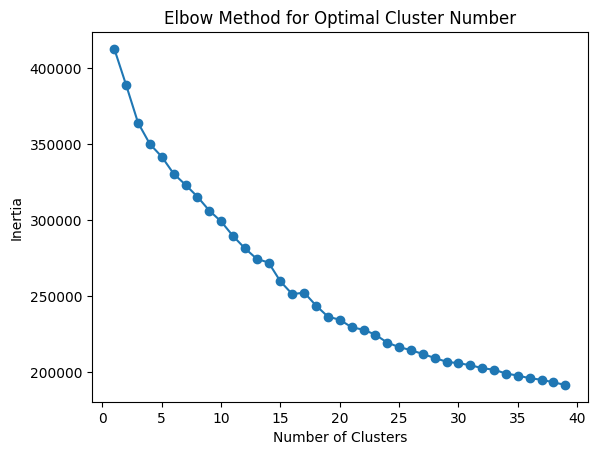

In [8]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using elbow-method
inertia = []
for n_clusters in range(1, 40):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow method to find the optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 40), inertia)
plt.scatter(range(1, 40), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()

## We see that the curve bends at number of clusters = 3 and clusters = 17, so we will check the patterns for both the variations

### Patterns using 3 clusters

In [10]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 1.8 MB/s eta 0:00:00a 0:00:01


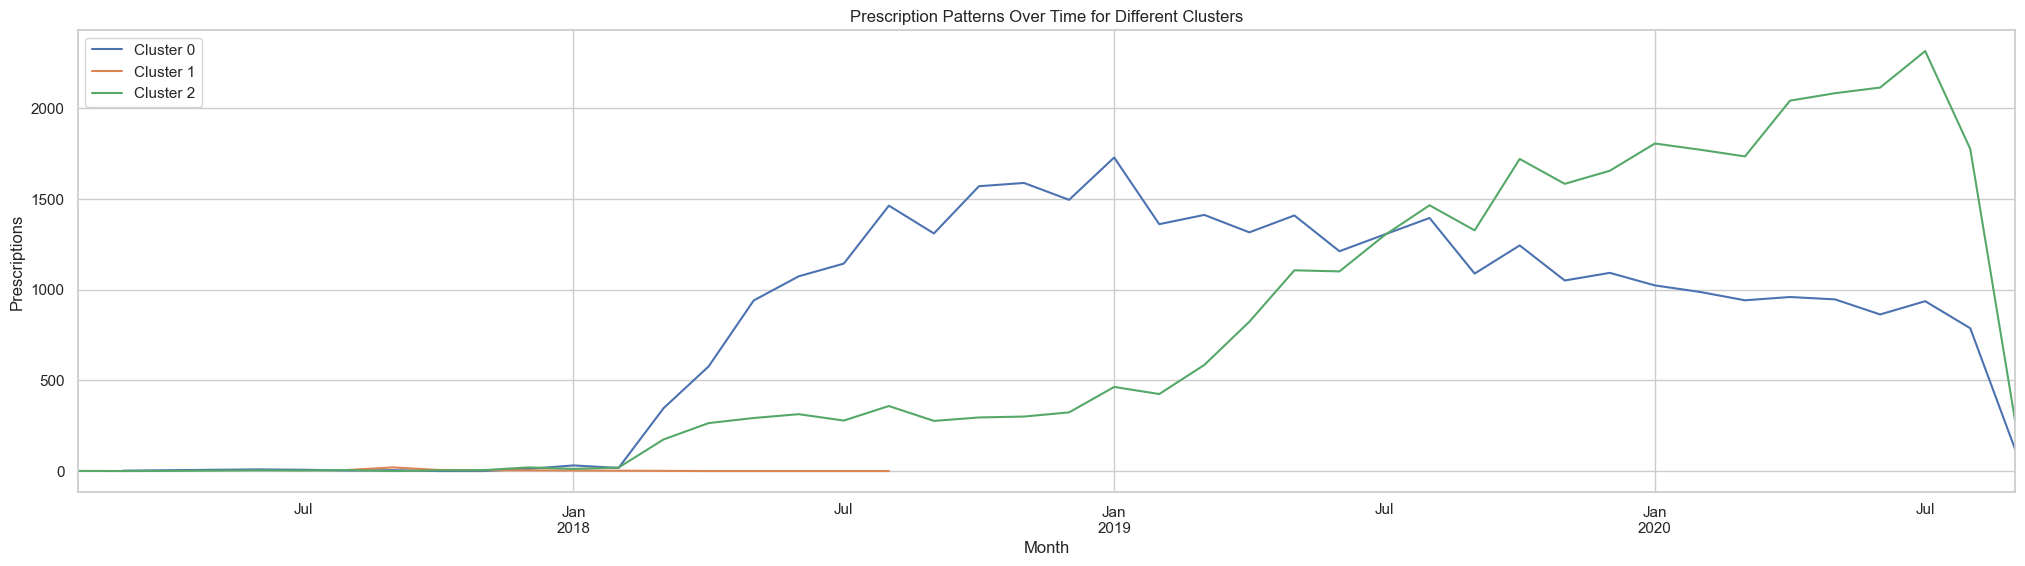

In [11]:
# Choose the optimal number of clusters and apply K-Means clustering
optimal_clusters = 3  # Adjust as needed

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
patient_cluster_labels = kmeans.fit_predict(normalized_data)

# Create a dictionary to map patient IDs to cluster labels
patient_to_cluster = dict(zip(pivot_table.index, patient_cluster_labels))

# Add cluster labels to the original DataFrame (target_drug_data)
target_drug_data['Cluster'] = target_drug_data['Patient-Uid'].map(patient_to_cluster)

# Create a line plot to visualize prescription patterns for each cluster
import seaborn as sns
sns.set(style='whitegrid')
plt.figure(figsize=(25, 6))

for cluster in range(optimal_clusters):
    cluster_data = target_drug_data[target_drug_data['Cluster'] == cluster]
    prescription_counts = cluster_data.groupby('Month')['Incident'].count()
    prescription_counts.plot(label=f'Cluster {cluster}')

plt.xlabel('Month')
plt.ylabel('Prescriptions')
plt.title('Prescription Patterns Over Time for Different Clusters')
plt.legend()
plt.show()

### Patterns using 17 clusters

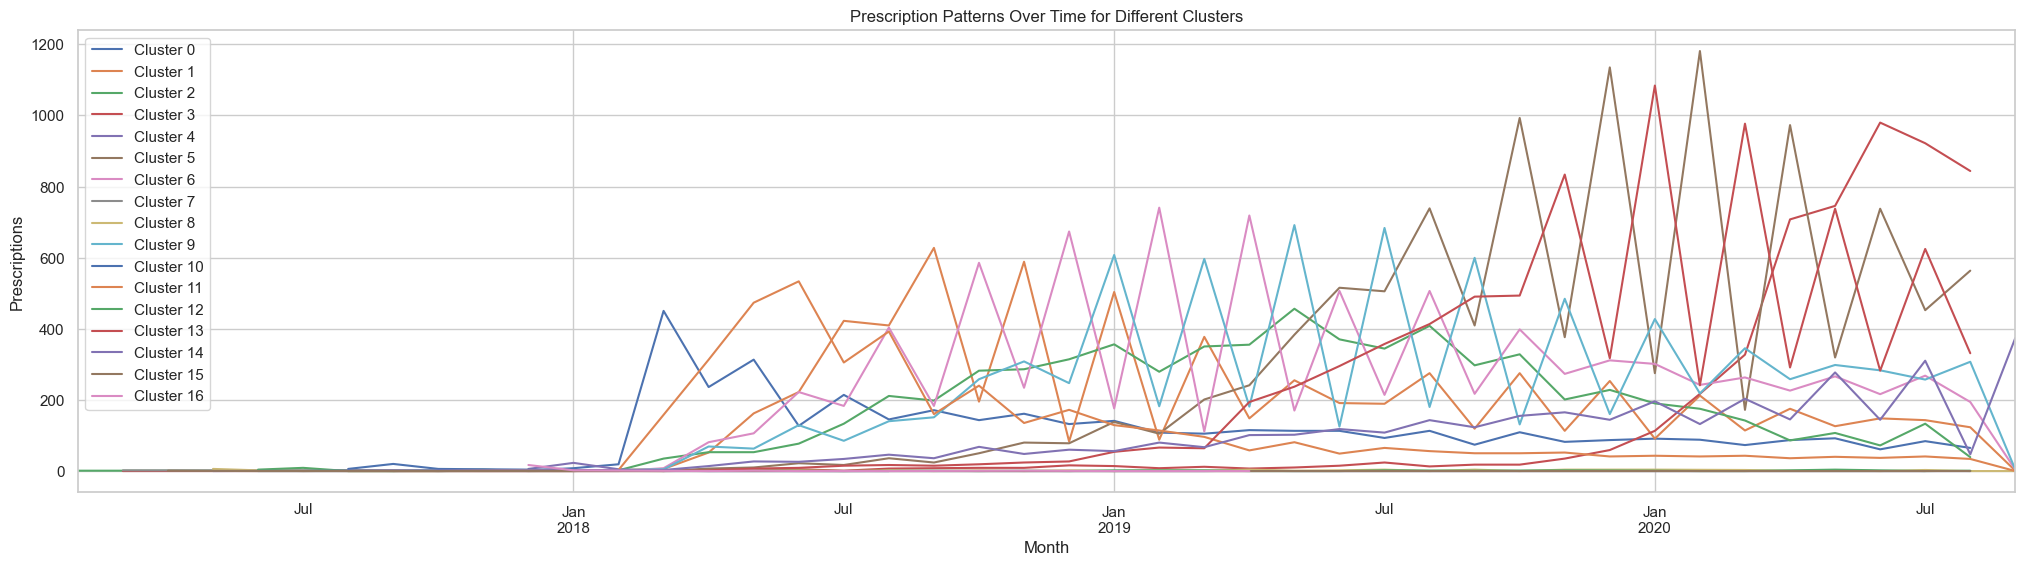

In [12]:
# Choose the optimal number of clusters and apply K-Means clustering
optimal_clusters = 17  # Adjust as needed

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
patient_cluster_labels = kmeans.fit_predict(normalized_data)

# Create a dictionary to map patient IDs to cluster labels
patient_to_cluster = dict(zip(pivot_table.index, patient_cluster_labels))

# Add cluster labels to the original DataFrame (target_drug_data)
target_drug_data['Cluster'] = target_drug_data['Patient-Uid'].map(patient_to_cluster)

# Create a line plot to visualize prescription patterns for each cluster
import seaborn as sns
sns.set(style='whitegrid')
plt.figure(figsize=(25, 6))

for cluster in range(optimal_clusters):
    cluster_data = target_drug_data[target_drug_data['Cluster'] == cluster]
    prescription_counts = cluster_data.groupby('Month')['Incident'].count()
    prescription_counts.plot(label=f'Cluster {cluster}')

plt.xlabel('Month')
plt.ylabel('Prescriptions')
plt.title('Prescription Patterns Over Time for Different Clusters')
plt.legend()
plt.show()